5906 5906


(0, 3000)

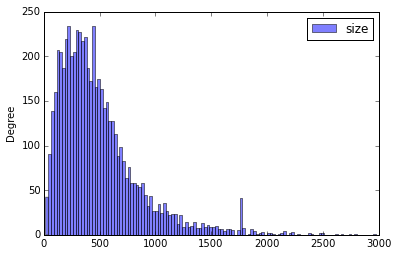

In [80]:
%matplotlib inline
from pyfasta import Fasta
import pandas as pd

f = Fasta('yeast.faa')

genelist = []
sizelist = []
fastalist = []
for header in f.keys():
    gene = header.split('|')[4].split('[')[0].strip()
    
    sizelist.append(len(f[header][:]))
    genelist.append(gene)
    fastalist.append(f[header][:])
print (len(genelist),len(sizelist))

df = pd.DataFrame({'gene':genelist, 'size':sizelist, 'sequence':fastalist})
df.plot(kind='hist', alpha=0.5, bins=200).set_xlim(0,3000)

###This is the results

In [48]:
df.mean()
df.median()

size    405
dtype: float64

In [76]:
df.head()

,gene,sequence,size
0,ribosomal 60S subunit protein L30,MAPVKSQESINQKLALVIKSGKYTLGYKSTVKSLRQGKSKLIIIAA...,105
1,Per1p,MRLAVVVTLLVHCFLVTCSPGDNLDEFIDCTYACEYNRRCPNSQIN...,357
2,Cdc123p,MSSQEYTTFIDIPVTRAQVEHCSYSFWSSLYPKYVPKSIVLKSLPK...,360
3,D-serine ammonia-lyase DSD1,MSDVLSQYKGCSVRDLPTPNFVINEEKFDKNCTTMLNNVEKLSQEC...,428
4,Cdc42p,MQTLKCVVVGDGAVGKTCLLISYTTNQFPADYVPTVFDNYAVTVMI...,191


In [64]:
df

,gene,size
0,ribosomal 60S subunit protein L30,105
1,Per1p,357
2,Cdc123p,360
3,D-serine ammonia-lyase DSD1,428
4,Cdc42p,191
5,superoxide dismutase SOD1,154
6,phosphogluconate dehydrogenase (decarboxylatin...,492
7,Rkm5p,367
8,hypothetical protein YJL136W-A,27
9,Chz1p,153


In [79]:
arp = df[df['gene'].str.contains('Arp')]
arp

,gene,sequence,size
1417,Arp8p,MSQEEAESSIIYEEPIDIPLEDDDDEDELEEENSVPLSSQADQENA...,881
2665,Arp9p,MAPFRQDSILIIYPRSQTTLVQFGLNEETFTVPELEIPTQIYRTTR...,467
2840,Arp6p,METPPIVIDNGSYEIKFGPSTNKKPFRALNALAKDKFGTSYLSNHI...,438
3479,Arp10p,MSNTIVIVYLGANRIEIGRSADACPQEIIAWKTGSINEKNREELKK...,284
3591,Arp4p,MSNAALQVYGGDEVSAVVIDPGSYTTNIGYSGSDFPQSILPSVYGK...,489
4409,Arp7p,MTLNRKCVVIHNGSHRTVAGFSNVELPQCIIPSSYIKRTDEGGEAE...,477
5114,Arp5p,MSSRDASLTPLKAVVIDDPPLRQTPEPFDEQSAYNPQSPIAIDFGS...,755


In [81]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()

ImportError: No module named 'rpy2'

In [82]:
ls *.gff

NC_001133.gff  NC_001136.gff  NC_001139.gff  NC_001142.gff  NC_001145.gff  NC_001148.gff
NC_001134.gff  NC_001137.gff  NC_001140.gff  NC_001143.gff  NC_001146.gff  NC_001224.gff
NC_001135.gff  NC_001138.gff  NC_001141.gff  NC_001144.gff  NC_001147.gff


In [84]:
gff = pd.read_csv('NC_001133.gff')

CParserError: Error tokenizing data. C error: Expected 1 fields in line 8, saw 2


In [87]:
gff = pd.read_table('NC_001136.gff',sep='\t',skiprows=5, names=["seqid", "source", "type","start","end","score","strand","phase","attributes"])

,seqid,source,type,start,end,score,strand,phase,attributes
0,NC_001136.10,RefSeq,region,1,1531933,.,+,.,ID=id0;Dbxref=taxon:559292;chromosome=IV;gbkey...
1,NC_001136.10,RefSeq,region,1,904,.,-,.,ID=id1;Note=TEL04L%3B Telomeric region on the ...
2,NC_001136.10,RefSeq,repeat_region,1,154,.,-,.,ID=id2;Note=TEL04L-TR%3B Terminal stretch of t...
3,NC_001136.10,RefSeq,region,137,1392,.,+,.,ID=id3;Note=ARS400%7EAutonomously Replicating ...
4,NC_001136.10,RefSeq,repeat_region,155,434,.,-,.,ID=id4;Note=TEL04L-XR%3B Telomeric X element c...
5,NC_001136.10,RefSeq,repeat_region,435,904,.,-,.,ID=id5;Note=TEL04L-XC%3B Telomeric X element C...
6,NC_001136.10,RefSeq,gene,1802,2953,.,+,.,ID=gene0;Name=COS7;Dbxref=GeneID:851348;gbkey=...
7,NC_001136.10,RefSeq,mRNA,1802,2953,.,+,.,ID=rna0;Name=NM_001180308.1;Parent=gene0;Dbxre...
8,NC_001136.10,RefSeq,exon,1802,2953,.,+,.,ID=id6;Parent=rna0;Dbxref=Genbank:NM_001180308...
9,NC_001136.10,RefSeq,CDS,1802,2953,.,+,0,ID=cds0;Name=NP_010033.1;Parent=rna0;Note=hypo...


In [162]:
def regexfind(string):
    split = string.split(';')
    results ={}
    if len(split)>0:
        for item in split:
            a = item.split('=')
            results[a[0]]=a[1]
    return (results)




In [163]:
data = gff[gff['type']=='CDS']['attributes'].apply(regexfind)
data

9         (cds0, )
13        (cds1, )
17        (cds2, )
21        (cds3, )
26        (cds4, )
30        (cds5, )
34        (cds6, )
38        (cds7, )
42        (cds8, )
46        (cds9, )
50       (cds10, )
54       (cds11, )
58       (cds12, )
62       (cds13, )
66       (cds14, )
70       (cds15, )
74       (cds16, )
78       (cds17, )
82       (cds18, )
87       (cds19, )
91       (cds20, )
95       (cds21, )
99       (cds22, )
103      (cds23, )
107      (cds24, )
111      (cds25, )
116      (cds26, )
117      (cds26, )
121      (cds27, )
125      (cds28, )
           ...    
3186    (cds725, )
3190    (cds726, )
3194    (cds727, )
3198    (cds728, )
3202    (cds729, )
3206    (cds730, )
3210    (cds731, )
3214    (cds732, )
3218    (cds733, )
3222    (cds734, )
3226    (cds735, )
3231    (cds736, )
3235    (cds737, )
3239    (cds738, )
3243    (cds739, )
3247    (cds740, )
3254    (cds741, )
3258    (cds742, )
3262    (cds743, )
3266    (cds744, )
3270    (cds745, )
3274    (cds

In [135]:
a.group

<_sre.SRE_Match object; span=(0, 9), match='ID=id936;'>